In [1]:
#STEP 1
#Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

#Display settings, to ensure all columns are shown
pd.set_option("display.max_columns", None)


In [2]:
#STEP 2
#Loading testing and training datasets
train = pd.read_csv("/kaggle/input/btt-dataspark-2025/train.csv")
test = pd.read_csv("/kaggle/input/btt-dataspark-2025/test.csv")

print("Train Dataset sample: ")
print(train.head())

print("\nTrain Dataset info: ")
print(train.info())

print("\nTrain Dataset summary: ")
print(train.describe())

print("\nTest Dataset sample: ")
print(test.head())

print("\nTest Dataset info: ")
print(test.info())

print("\nTest Dataset summary: ")
print(test.describe())

Train Dataset sample: 
   id   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0  40.0       160.0        50.0       61.0             0.8   
1   1  50.0       160.0        60.0       83.0             0.9   
2   2  40.0       165.0        55.0       82.0             1.2   
3   3  45.0       165.0        75.0       86.6             1.2   
4   4  60.0       160.0        70.0       90.0             0.7   

   eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
0              1.0            1.0             1.0     110.0        70.0   
1              1.0            1.0             1.0     134.0        88.0   
2              1.2            1.0             1.0     112.0        64.0   
3              1.5            1.0             1.0     128.0        81.0   
4              0.5            1.0             1.0     111.0        63.0   

   fasting blood sugar  Cholesterol  triglyceride   HDL    LDL  hemoglobin  \
0                 97.0        216.0          83.0  

In [3]:
#STEP 3
#Checking for missing values in the dataset

# Check for missing values in the training data
print("\nMissing Values in Training Data:")
print(train.isnull().sum())

# Check for missing values in the test data
print("\nMissing Values in Test Data:")
print(test.isnull().sum())



Missing Values in Training Data:
id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

Missing Values in Test Data:
id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            

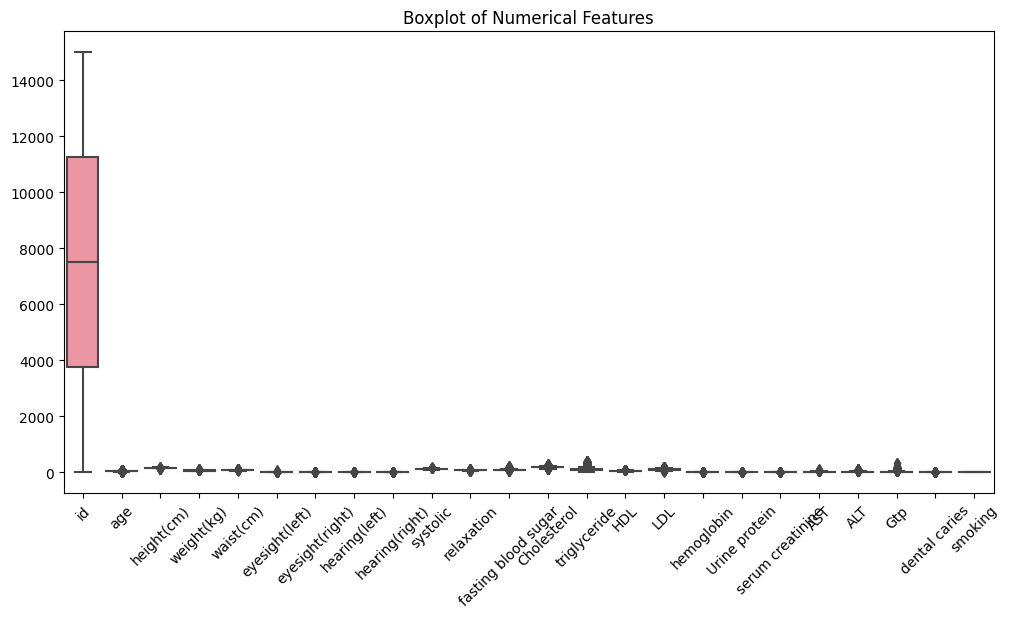

In [4]:
#STEP 4
#Check for outliers
numerical_columns = train.select_dtypes(include=["int64", "float64"]).columns

# Plot boxplots for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=train[numerical_columns])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

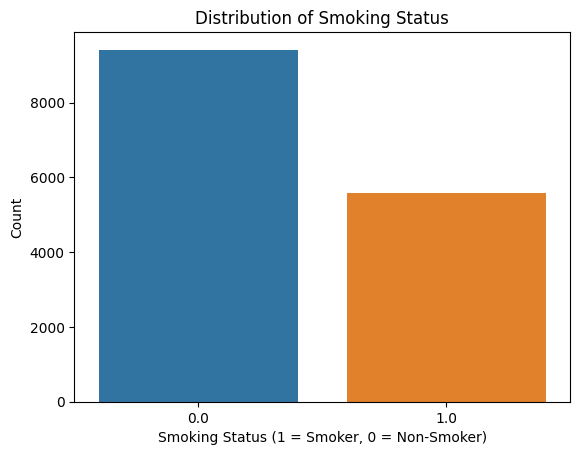

Non-smokers: 9412, Smokers: 5588, Ratio: 1.68:1


In [5]:
# Plot the distribution of the smoking column
sns.countplot(x="smoking", data=train)
plt.title("Distribution of Smoking Status")
plt.xlabel("Smoking Status (1 = Smoker, 0 = Non-Smoker)")
plt.ylabel("Count")
plt.show()

# Calculate the ratio of non-smokers to smokers
non_smokers = train["smoking"].value_counts()[0]
smokers = train["smoking"].value_counts()[1]
print(f"Non-smokers: {non_smokers}, Smokers: {smokers}, Ratio: {non_smokers/smokers:.2f}:1")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


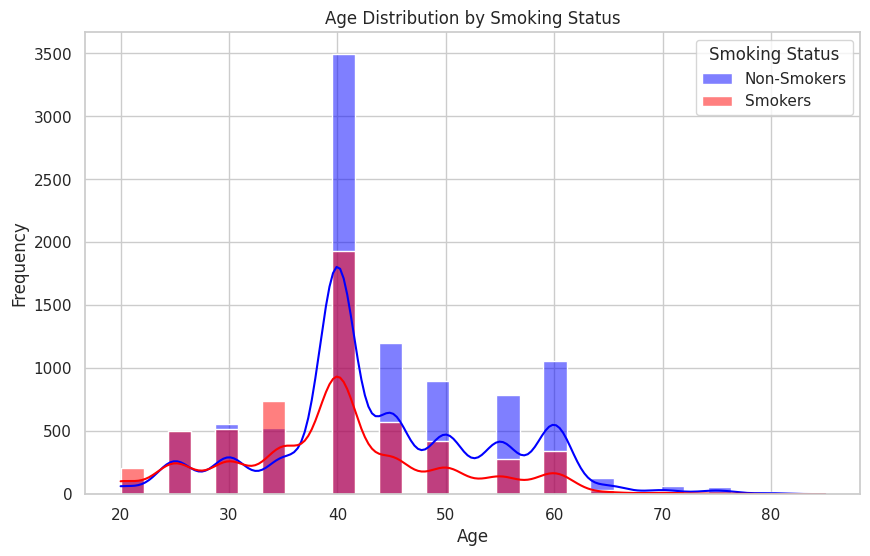

In [6]:
#Using a histogram to check the distribution of the age against the smoking column
#Set the style for the plot
sns.set(style="whitegrid")

# Create overlapping histograms for age by smoking status
plt.figure(figsize=(10, 6))
sns.histplot(train[train["smoking"] == 0]["age"], color="blue", label="Non-Smokers", kde=True, bins=30)
sns.histplot(train[train["smoking"] == 1]["age"], color="red", label="Smokers", kde=True, bins=30)
plt.title("Age Distribution by Smoking Status")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(title="Smoking Status")
plt.show()

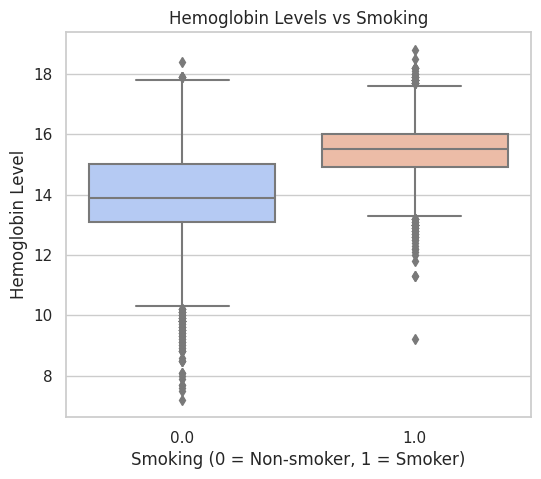

In [7]:
#Haemoglobin versus smoking 
plt.figure(figsize=(6, 5))
sns.boxplot(x=train["smoking"], y=train["hemoglobin"], palette="coolwarm")
plt.title("Hemoglobin Levels vs Smoking")
plt.xlabel("Smoking (0 = Non-smoker, 1 = Smoker)")
plt.ylabel("Hemoglobin Level")
plt.show()


In [8]:
# Correlation between hemoglobin and smoking
correlation = train["hemoglobin"].corr(train["smoking"])
print(f"Correlation between Hemoglobin and Smoking: {correlation:.4f}")


Correlation between Hemoglobin and Smoking: 0.5087


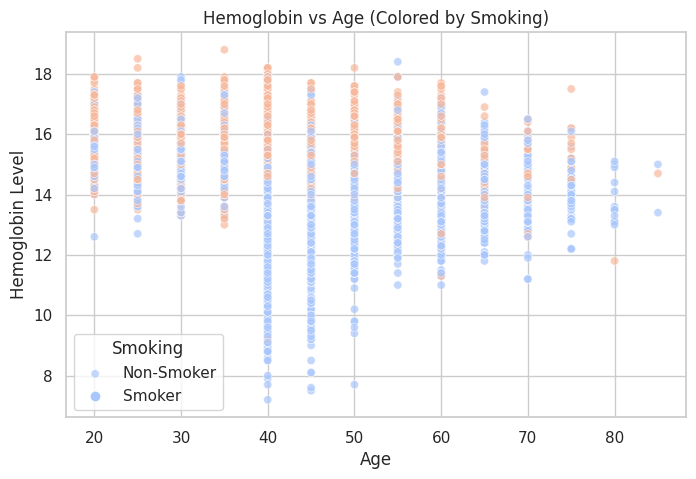

In [9]:
#Scatterplot of Hemoglobin vs. Age
plt.figure(figsize=(8, 5))
sns.scatterplot(x=train["age"], y=train["hemoglobin"], hue=train["smoking"], palette="coolwarm", alpha=0.7)
plt.title("Hemoglobin vs Age (Colored by Smoking)")
plt.xlabel("Age")
plt.ylabel("Hemoglobin Level")
plt.legend(title="Smoking", labels=["Non-Smoker", "Smoker"])
plt.show()

In [10]:
# Correlation between Cholesterol and Smoking
cholesterol_smoking_correlation = train["Cholesterol"].corr(train["smoking"])
print(f"Correlation between Cholesterol and Smoking: {cholesterol_smoking_correlation:.4f}")


Correlation between Cholesterol and Smoking: -0.0352


In [11]:
# Compute correlation with smoking inorder to check for strong predictor variable
correlation_matrix = train.corr()
smoking_correlation = correlation_matrix["smoking"].sort_values(ascending=False)

# Display top correlated features
print(smoking_correlation)

smoking                1.000000
hemoglobin             0.508659
height(cm)             0.479957
weight(kg)             0.406706
Gtp                    0.378144
triglyceride           0.360671
serum creatinine       0.341364
waist(cm)              0.315700
ALT                    0.253727
eyesight(right)        0.152799
relaxation             0.152435
dental caries          0.133859
systolic               0.119918
AST                    0.106922
fasting blood sugar    0.106655
eyesight(left)         0.055375
Urine protein          0.009422
id                     0.002866
hearing(left)         -0.003737
hearing(right)        -0.011613
Cholesterol           -0.035164
LDL                   -0.044322
age                   -0.186832
HDL                   -0.298066
Name: smoking, dtype: float64


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Select features and target
X = train[["height(cm)", "hemoglobin"]]  # Predictor variables
y = train["smoking"]  # Target variable

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_val)
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78      1868
         1.0       0.64      0.63      0.64      1132

    accuracy                           0.73      3000
   macro avg       0.71      0.71      0.71      3000
weighted avg       0.73      0.73      0.73      3000

AUC-ROC Score: 0.8225135913771839


In [13]:
#Model Improvement
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Resampled Class Distribution:")
print(y_resampled.value_counts())

Resampled Class Distribution:
smoking
1.0    7544
0.0    7544
Name: count, dtype: int64


In [14]:
#Retrain the Model
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model on the resampled data
model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=42)

In [15]:
#Evaluate the model
from sklearn.metrics import classification_report, roc_auc_score

# Evaluate the model
y_pred = model.predict(X_val)
print("Classification Report with SMOTE:")
print(classification_report(y_val, y_pred))
print("AUC-ROC Score with SMOTE:", roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]))

Classification Report with SMOTE:
              precision    recall  f1-score   support

         0.0       0.88      0.71      0.79      1868
         1.0       0.64      0.84      0.72      1132

    accuracy                           0.76      3000
   macro avg       0.76      0.78      0.76      3000
weighted avg       0.79      0.76      0.76      3000

AUC-ROC Score with SMOTE: 0.8224663005727861


In [16]:
#Using the trained model to predict probabilities for the test dataset.
# Select the same features used for training
X_test = test[["height(cm)", "hemoglobin"]]

# Predict probabilities for the test dataset
y_test_probs = model.predict_proba(X_test)[:, 1]

# Create a submission file
submission = pd.DataFrame({
    "id": test["id"],  # Use the ID column from the test dataset
    "smoking": y_test_probs  # Use predicted probabilities
})

# Save to CSV
submission.to_csv("submission.csv", index=False)

# Display the first few rows of the submission file
print(submission.head)

<bound method NDFrame.head of          id   smoking
0     15000  0.150759
1     15001  0.532902
2     15002  0.084407
3     15003  0.688827
4     15004  0.660734
...     ...       ...
9995  24995  0.680704
9996  24996  0.851155
9997  24997  0.192340
9998  24998  0.168962
9999  24999  0.652247

[10000 rows x 2 columns]>


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Select features and target
X = train[["Gtp", "hemoglobin","serum creatinine", "weight(kg)","triglyceride", "height(cm)", "waist(cm)", "age"]]  # Predictor variable (BMI)
y = train["smoking"]  # Target variable (smoking)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred = model.predict(X_val)
y_probs = model.predict_proba(X_val)[:, 1]  # Probabilities for the positive class (smoking)

print("Classification Report:")
print(classification_report(y_val, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_val, y_probs))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83      1868
         1.0       0.72      0.75      0.73      1132

    accuracy                           0.79      3000
   macro avg       0.78      0.79      0.78      3000
weighted avg       0.80      0.79      0.79      3000

AUC-ROC Score: 0.8769599673882613


In [18]:
#using the trained model to predict probablities for the test dataset
# Select the same features used for training
features = ["Gtp", "hemoglobin","serum creatinine", "weight(kg)","triglyceride", "height(cm)", "waist(cm)", "age"]  # Replace with your selected features
X_test = test[features]

# Make predictions on the test dataset
# Predict probabilities for the test dataset
y_test_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (smoking)

# Create a submission file
submission = pd.DataFrame({
    "id": test["id"],  # Use the ID column from the test dataset
    "smoking": y_test_probs  # Use predicted probabilities
})

# Save to CSV
submission.to_csv("submission.csv", index=False)

# Display the first few rows of the submission file
print("Submission File Preview:")
print(submission.head())

Submission File Preview:
      id  smoking
0  15000     0.30
1  15001     0.77
2  15002     0.01
3  15003     0.63
4  15004     0.22
